**Progress Report #1 - Data Exploration**

Team Name: Regal Royals

1. Shinhyuk Park
2. Devin Dupree
3. Samnang Pech

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/Electric_Vehicle_Population_Data.xlsx'

# Read the Excel file into a pandas DataFrame
eCar = pd.read_excel(url)

# **Seaborn single feature plots**

1. Create a histogram for years of electric vehicles

Text(0.5, 1.0, 'Histogram of Model Years')

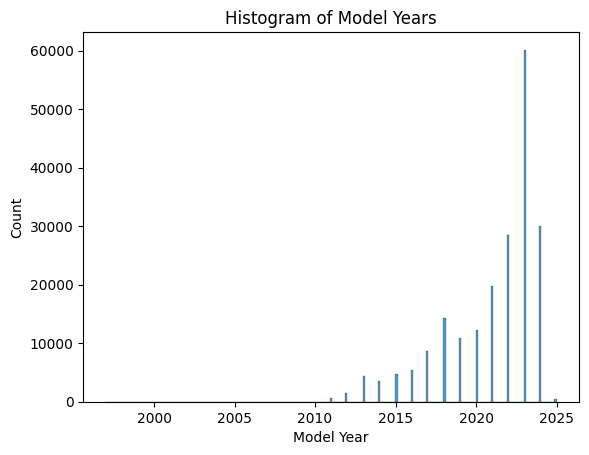

In [2]:
import seaborn as sns
sns.histplot(x='Model Year', data=eCar)
plt.title('Histogram of Model Years')

**Interpretation**:

* The histogram highlights the popularity of the models by year. The newer the
model of the behicle, the more that are on the road being driven.

2. A density plot showing each models' electric driving range

Text(0.5, 1.0, 'Density plot of Electric Range')

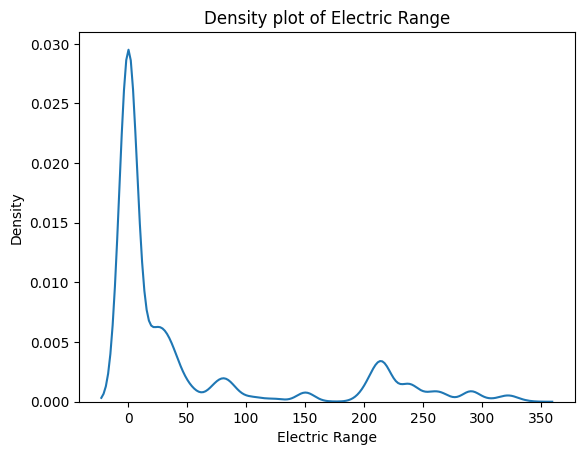

In [ ]:
sns.kdeplot(x='Electric Range', data=eCar)
plt.title('Density plot of Electric Range')


**Interpretation:**

*   The curve of the density plot shows the sum of the normal distributions of electric range of the vehicles and was done by centering the distributions over the data points.





3. A bar chart showing the makes with most EV's in Washington

Text(0.5, 1.0, 'Count Plot of Electric Vehicle Type')

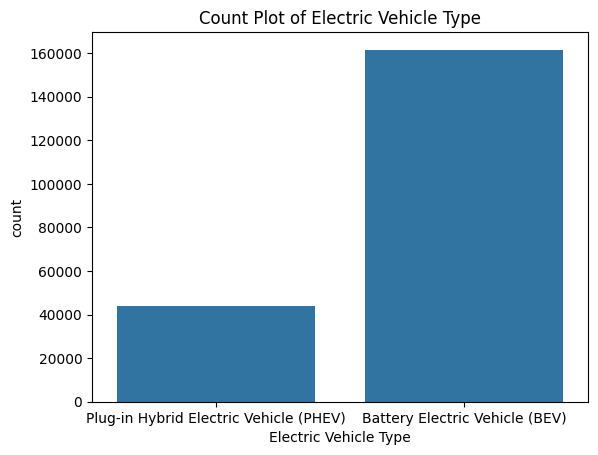

In [ ]:
sns.countplot(x='Electric Vehicle Type', data=eCar)
plt.title('Count Plot of Electric Vehicle Type')


**Interpretation**


*   The count plot above compares the frequency of BEV's & PHEV.
*   Knowing the number of occurences of each tells us which option of the EV is more popular based on the dataset used.



3. Create a boxplot for electric range

Text(0.5, 1.0, 'Box Plot of Electric Range')

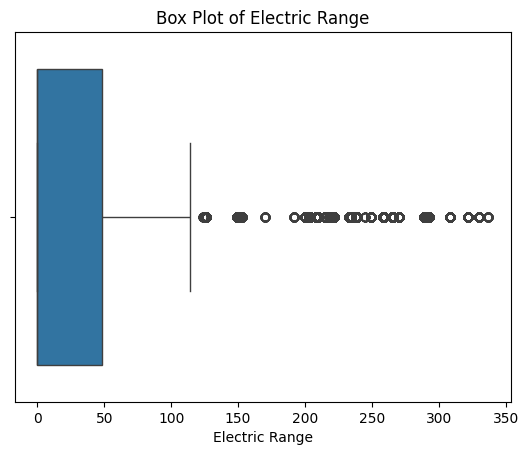

In [ ]:
sns.boxplot(x='Electric Range', data=eCar)
plt.title('Box Plot of Electric Range')

**Interpretation**

*   The box plot gives a visual of the quartile range of electric range.
*   This lets us know which quartile the majority of the EV's range falls into.
*   In this case, there are not many outliers as the data is consistent.






4. Create a violin plot showing the popularity of electric vehicles over time

Text(0.5, 1.0, 'Violin Plot of Model Years')

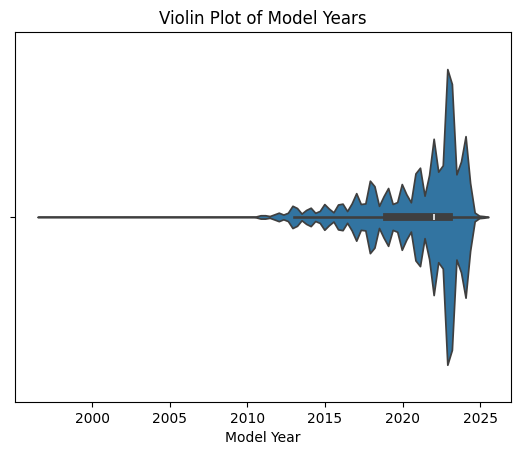

In [ ]:
sns.violinplot(x='Model Year', data=eCar)
plt.title('Violin Plot of Model Years')


**Interpretation**

*   The width of the plot here becomes more vast in the early 2020's.
*   The violin plot highlights both density and magnitude of the data at the same time.






# **Two feature plots in seaborn**

1. Create a scatterplot showing the trend of electric range through the years with different colors representing different car manufacturers, and different markers representing different types of electric vehicles.

Text(0.5, 1.0, 'Scatter Plot of Model Years vs. Electric Range')

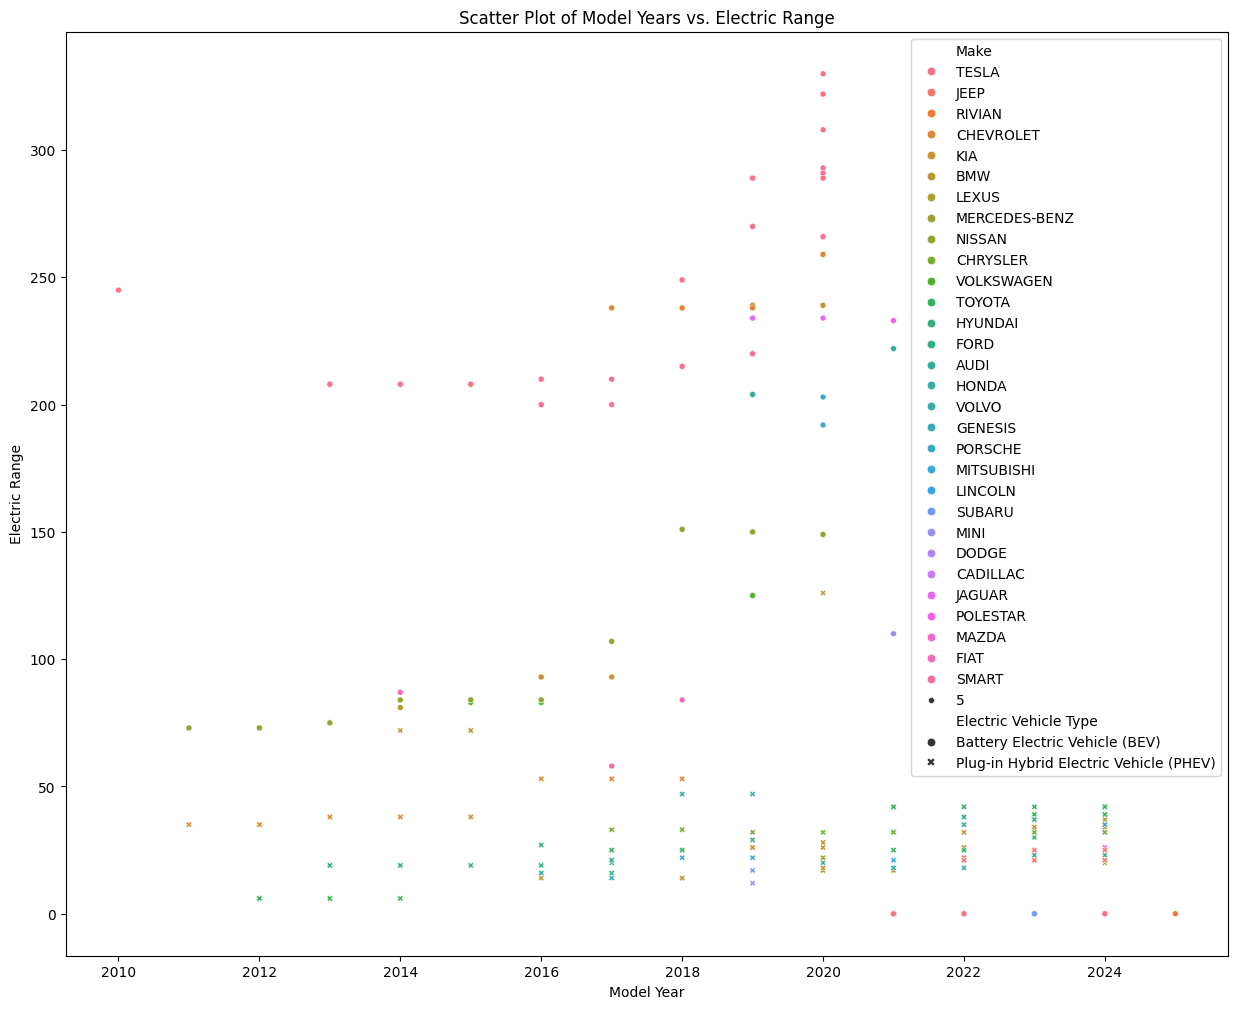

In [ ]:
eCar_sample = eCar.sample(n=1000)
plt.figure(figsize=(15, 12))
sns.scatterplot(data=eCar_sample, x='Model Year', y='Electric Range', hue = 'Make', style = 'Electric Vehicle Type', size = 5)
plt.title('Scatter Plot of Model Years vs. Electric Range')

**Interpretation**

*   The scatter plot shows the trend of electric range by year.
*   This plot makes it easier to identify outliers.
*   This plot help you see if battery electric vehicles and plug-in hybrids have different ranges or if certain types are more common in recent years.
*   In the case of this plot, there are several outliers before 2010.






2. Create swarm plot to show the distribution of Model Year for different manufacturers (Make) and how different electric vehicles are distributed across different years and manufacturers. Since swarm plot requires space to arrange all the data points without overlapping, we used .sample() function to reduce the data size and prevent this error.

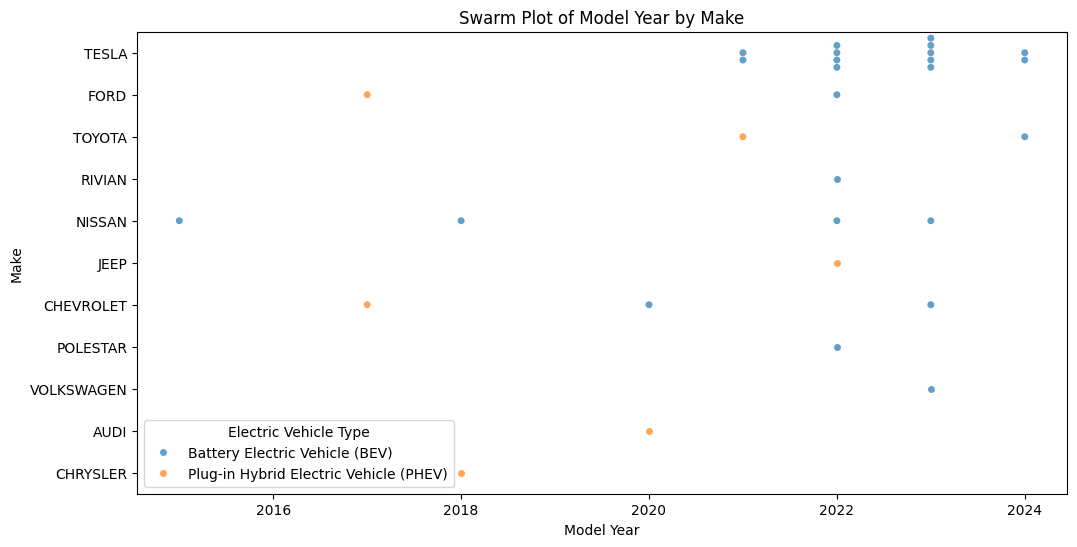

In [ ]:
eCar_reduced = eCar.sample(n=30)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=eCar_reduced, x='Model Year', y='Make', hue='Electric Vehicle Type', alpha=0.7)
plt.title('Swarm Plot of Model Year by Make')
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.show()

**Interpretation**

*   The swarm plot shows how many cars from each manufacturer are represented in different years.
*   This plot helps you to recognize which types (e.g. battery electric or plug-in hybrid) were more common for specific manufacturers in different years.

3. Create strip plot for Electric Vehicle Type grouped according to Electric Range, and different markers representing different types of electric vehicles.

Text(0.5, 1.0, 'Strip Plot of Electric Vehicle Type by Electric Range')

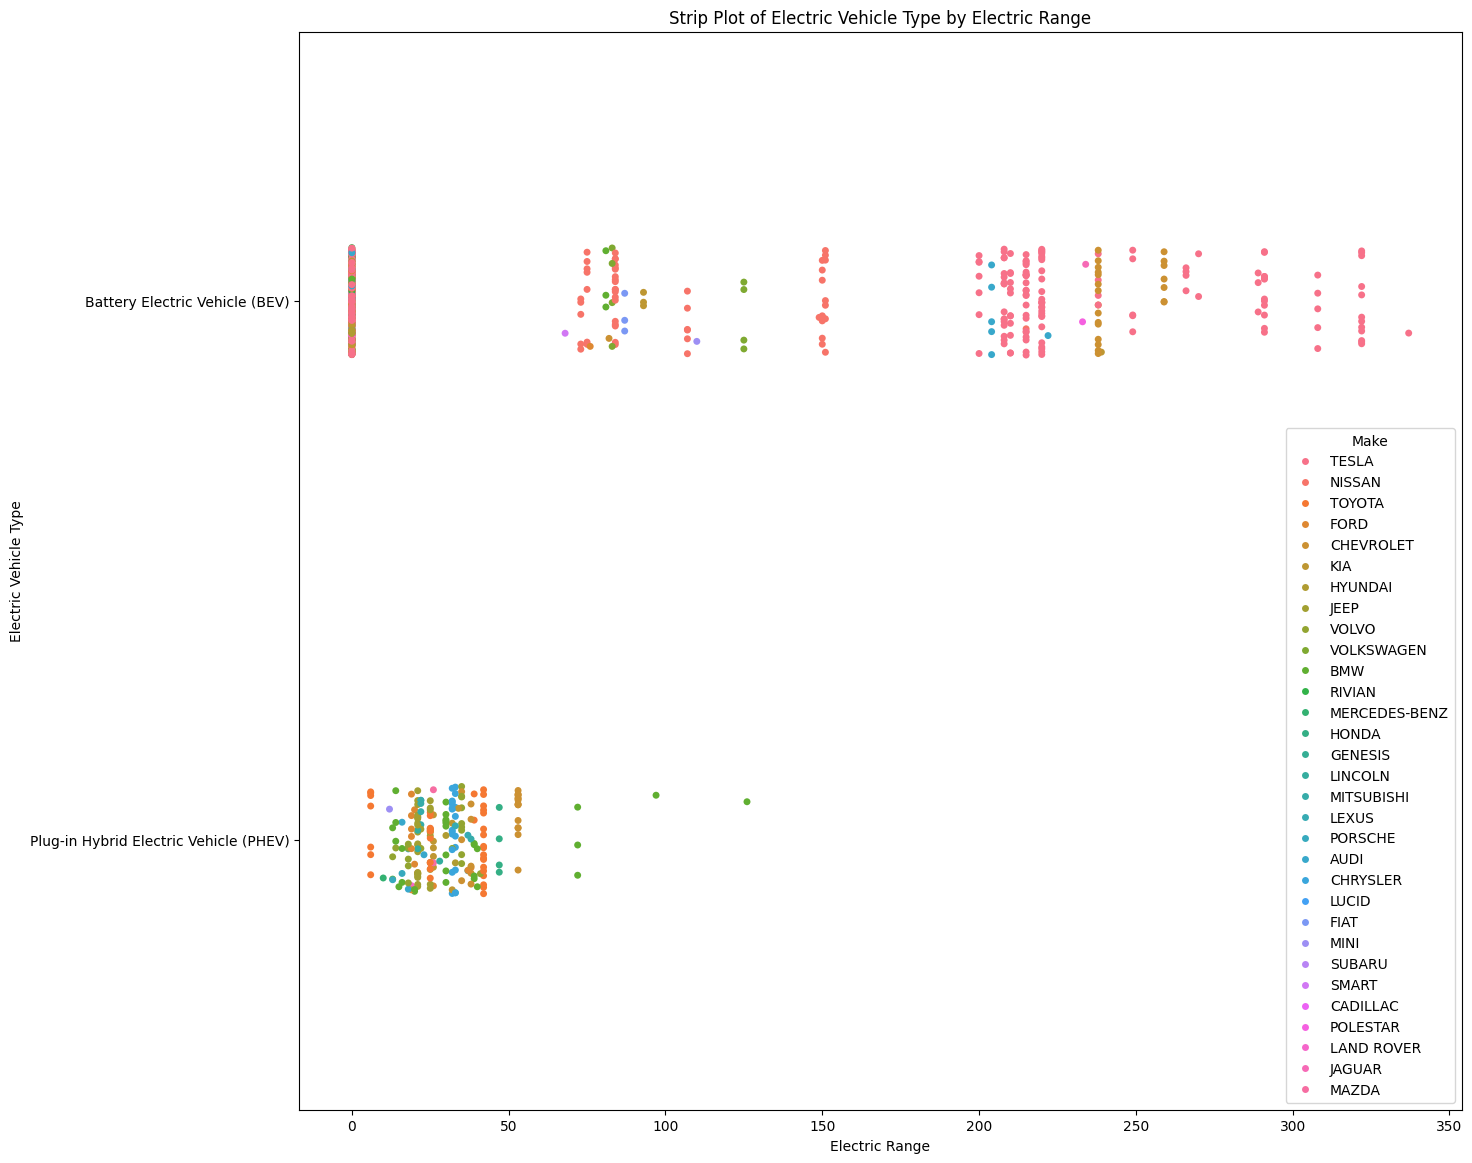

In [ ]:
eCar_sample3 = eCar.sample(n=1000)
plt.figure(figsize=(15, 14))
sns.stripplot(data=eCar_sample3, x='Electric Range', y='Electric Vehicle Type', hue = 'Make', size = 5)
plt.title('Strip Plot of Electric Vehicle Type by Electric Range')

**Interpretation**

*   The plot helps you see how the electric range varies for different types of electric vehicles.
*   The stripplot helps you to see if certain manufacturers are producing more powerful electric vehicles.



# **Exploratory data analysis**

**Step 1: Initial Data Understanding**

We start by examining the dataset's overall structure, including its size and types of features. Specifically, we’ll determine the number of rows and columns and classify each feature as either numerical or categorical.

In [ ]:
# Size of the dataset
print(f"Dataset size (rows, columns): {eCar.shape}")

# Identify numerical and categorical features
numerical_features = eCar.select_dtypes(include=['float64', 'int64']).columns
categorical_features = eCar.select_dtypes(include=['object']).columns

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Dataset size (rows, columns): (205439, 17)
Numerical features: Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')
Categorical features: Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


**Interpretation:**


*   The output shows the size of the dataset (number of rows and columns), giving an overview of how large the dataset is.
*   The code identifies the numerical features (columns with numerical data) and categorical features (columns with text or category data). This categorization helps in determining which columns can be used for statistical and visualization tasks.



**Step 2: Identify Relationships Between Features**

We will analyze the relationships between numerical features using a correlation matrix. The correlation values range between -1 and 1, where:

*   Positive values indicate a direct relationship (as one feature increases, the other also increases).
*   Negative values indicate an inverse relationship (as one feature increases, the other decreases).
*   Values closer to 0 indicate a weak relationship.

We will also visualize these correlations using a heatmap.






                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.001019       -0.001556  -0.002685   
Model Year              -0.001019    1.000000       -0.507739  -0.231280   
Electric Range          -0.001556   -0.507739        1.000000   0.113545   
Base MSRP               -0.002685   -0.231280        0.113545   1.000000   
Legislative District    -0.410291   -0.015640        0.019888   0.010440   
DOL Vehicle ID           0.006023    0.200597       -0.131015  -0.037803   
2020 Census Tract        0.496433    0.005724       -0.001186   0.000878   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.410291        0.006023           0.496433  
Model Year                       -0.015640        0.200597           0.005724  
Electric Range                    0.019888       -0.131015          -0.001186  
Base MSRP                         0.010440       -0.037803           0.

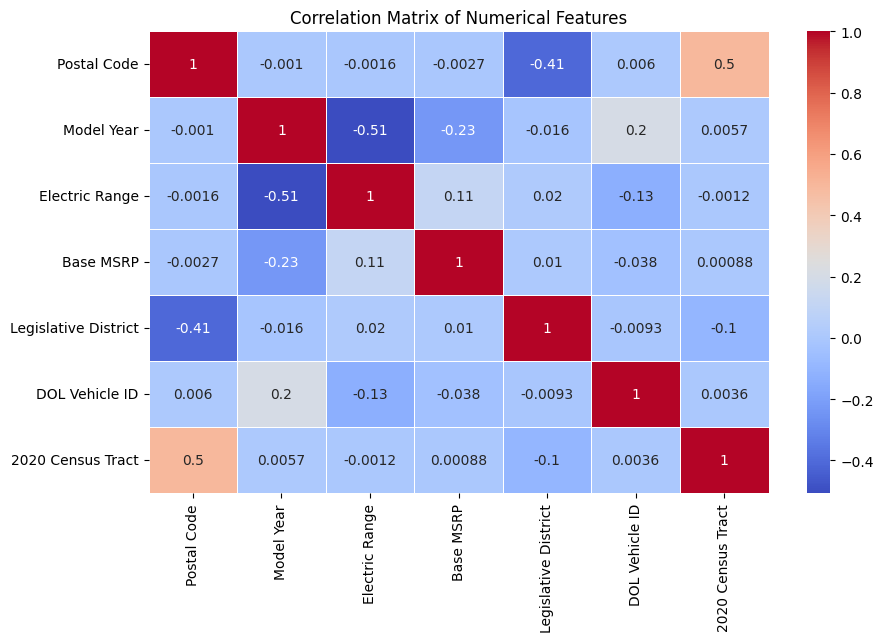

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix for numerical features
correlation = eCar[numerical_features].corr()
print(correlation)

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation:**


*   The correlation matrix shows the strength and direction (positive or negative) of relationships between numerical features.

*   The heatmap visually represents these correlations, where stronger correlations are closer to 1 (positive) or -1 (negative), while weaker correlations are closer to 0.
*   Strong positive correlations indicate that as one feature increases, the other tends to increase. Strong negative correlations indicate that as one feature increases, the other tends to decrease.




**Step 3: Describe the Shape of the Data**

We will explore the distribution of selected numerical features to check whether the data is symmetric or skewed. A histogram will be used for the "Electric Range" feature to visualize its distribution, and a KDE plot will provide a smooth density estimation for the "Base MSRP" feature.

**a. Histogram for Electric Range**

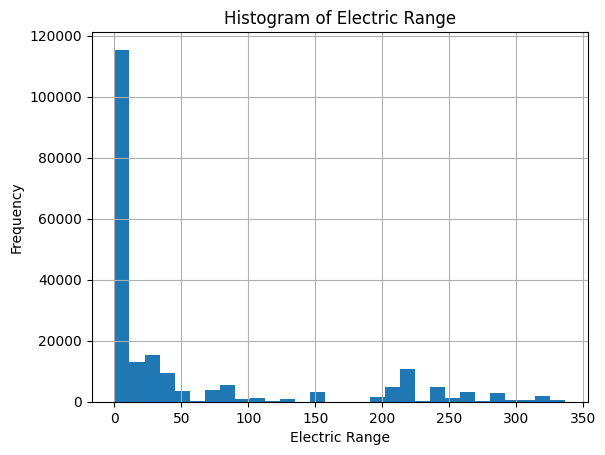

In [ ]:
# Plot histogram to see distribution shape
eCar['Electric Range'].hist(bins=30)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**


*   The histogram shows the frequency distribution of the "Electric Range" feature.

*   Since the data is right-skewed (concentrated more on the left side), it leans towards the right.
*  A symmetric distribution would have data evenly spread around the center, which is not the case here.


*   This helps in visually assessing the spread and shape of the electric range values, showing that most values are clustered near the lower end, with fewer entries in the higher range.



**b. KDE Plot for Base MSRP**

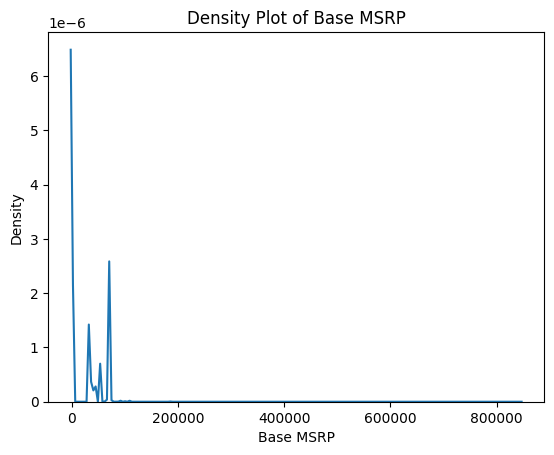

In [ ]:
# KDE plot of Base MSRP
sns.kdeplot(eCar['Base MSRP'])
plt.title('Density Plot of Base MSRP')
plt.xlabel('Base MSRP')
plt.show()

**Interpretation:**

*   The KDE plot provides a smooth estimate of the "Base MSRP" distribution.
*   A unimodal distribution has one peak, indicating that most values are clustered around a central point.

*   A multimodal distribution has multiple peaks, showing several clusters of data.
*   This helps in understanding whether the distribution is symmetric or skewed and where the concentration of data lies.





**Step 4: Detect Outliers and Missing Data**

In this step, we will identify outliers and check for missing data. Outliers can impact the analysis, so it is essential to detect them. A boxplot will be used to visualize outliers in the "Electric Range" feature. We will also check for missing values across all columns to ensure no important data is missing.

**a. Boxplot for Electric Range**

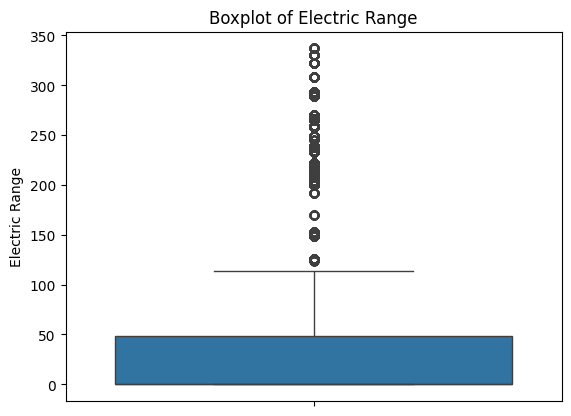

In [ ]:
# Boxplot for Electric Range
sns.boxplot(eCar['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.show()

**Interpretation:**

*   The boxplot identifies potential outliers in the "Electric Range" feature.
Outliers are represented as points outside the whiskers, which indicate values significantly higher or lower than the majority of the data.
*   The box represents the interquartile range (IQR), and the line in the middle is the median. Outliers may need to be handled, depending on their impact on the analysis.


**b. Check for Missing Data**

In [ ]:
# Check for missing values
missing_data = eCar.isnull().sum()
print("Missing values per column:\n", missing_data)

Missing values per column:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dty

**Interpretation:**

*   The output shows which columns contain missing values and how many values are missing in each column.
*   Missing data needs to be addressed, either by removing rows with missing values or filling the missing data with appropriate values, to ensure accurate analysis.



# **Dataset Summary Functions**

We will now summarize the dataset using Pandas functions to gain insights into the dataset's structure and content. The .shape method will provide the size of the dataset, .info() will give an overview of the data types and non-null counts, and .describe() will show statistical summaries for both numerical and categorical features.

**a. Dataset Size**

In [ ]:
print(f"Dataset shape: {eCar.shape}")

Dataset shape: (205439, 17)


**Interpretation:**

*   The .shape method returns the dimensions of the dataset, showing how many rows (instances) and columns (features) are present.
*   This provides a quick overview of the dataset's size and helps us understand the scope of the data we are working with.



**b. Dataset Information**

In [ ]:
eCar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

**Interpretation:**

*   The .info() method provides details about each feature, including its data type (e.g., int64, float64, object) and the number of non-null entries.
*   This helps in identifying potential issues like missing data and understanding the types of variables (numerical or categorical) we are dealing with.



**c. Dataset Summary Statistics**

In [ ]:
eCar.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,205439,205436,205436,205439,205436.000000,205439.000000,205439,205438,205439,205439,205431.000000,205431.000000,204997.000000,2.054390e+05,205431,205436,2.054360e+05
unique,12140,205,770,45,NaN,NaN,42,152,2,3,NaN,NaN,NaN,NaN,928,74,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1221,105237,33328,204997,NaN,NaN,90318,43437,161539,114172,NaN,NaN,NaN,NaN,5203,75156,NaN
mean,NaN,NaN,NaN,NaN,98177.971870,2020.960363,NaN,NaN,NaN,NaN,52.164342,922.670532,28.970848,2.277156e+08,NaN,NaN,5.297704e+10
std,NaN,NaN,NaN,NaN,2419.037479,2.989059,NaN,NaN,NaN,NaN,88.075859,7761.753602,14.910052,7.205737e+07,NaN,NaN,1.588435e+09
min,NaN,NaN,NaN,NaN,1731.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.469000e+03,NaN,NaN,1.001020e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2019.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000,1.935324e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98125.000000,2022.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,33.000000,2.382368e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98372.000000,2023.000000,NaN,NaN,NaN,NaN,48.000000,0.000000,42.000000,2.618718e+08,NaN,NaN,5.305307e+10


**Interpretation:**

*   The .describe() method generates summary statistics for numerical features, such as count, mean, standard deviation, min, max, and percentiles.
*   For categorical features, it provides the number of unique values, the most frequent value (mode), and the frequency of the mode.

*   This provides an overall summary of the data, helping us identify the central tendency, spread, and range of the values in both numerical and categorical columns.






# **Relationship visualization**

This section utilizes a variety of visualization methods on selected dataset columns to explore relationships within the dataset.

1. The code below is creating a box plot that compares the electric range for different car manufacturers. It customizes the size of the plot, adds labels to make it understandable, and ensures the manufacturer names are readable by rotating them. The final output will be a visual summary of how different manufacturers' electric vehicles compare in terms of their range.

<Figure size 1400x800 with 0 Axes>

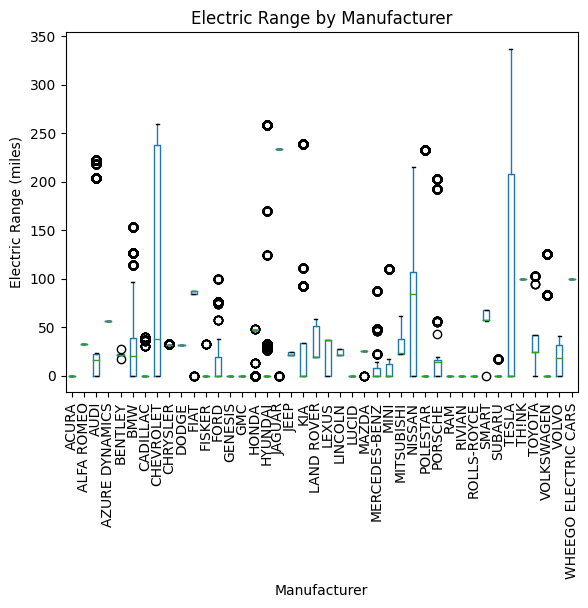

In [ ]:
plt.figure(figsize=(14, 8))
eCar.boxplot(column='Electric Range', by='Make', rot=90, grid=False)
plt.title('Electric Range by Manufacturer')
plt.suptitle('')
plt.xlabel('Manufacturer')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=90)
plt.show()

- By reviewing this result, you can see which manufacturers offer a wide variety of electric ranges (indicating a mix of short and long-range models) versus those that have similar ranges across their vehicles (consistent offerings). As a result, we can predict the popularity of a manufacturer by recognizing a broad range of model availability.

2. The code below creates histograms to show the distribution of Model Year and Electric Range for the eCar dataset. It customizes the size of the figure and adds black edges to the bars to make them clearer.

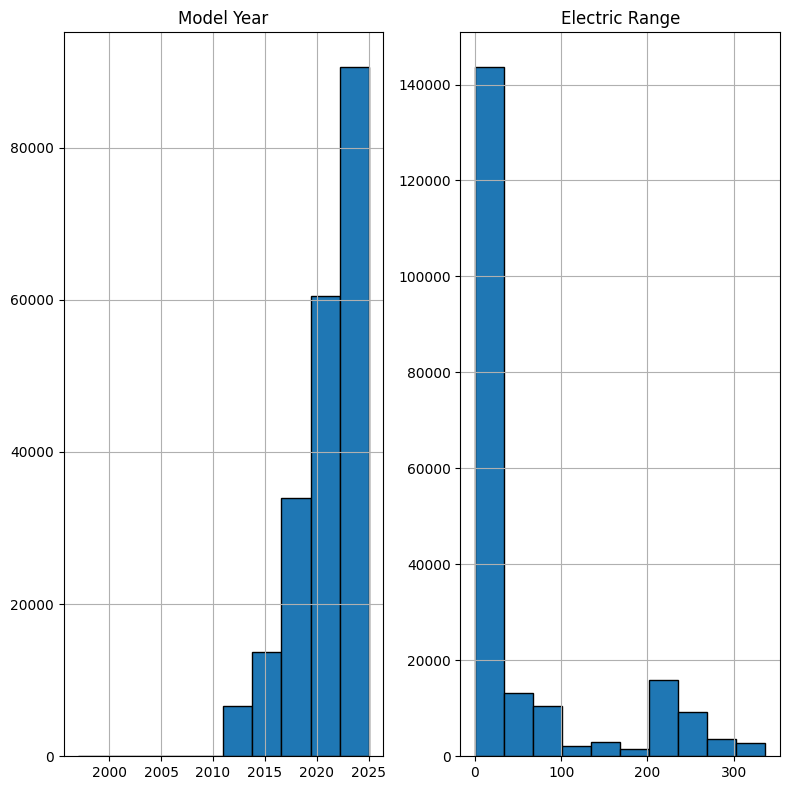

In [ ]:
eCar[['Model Year', 'Electric Range']].hist(figsize=(8, 8), edgecolor='black')
plt.tight_layout()
plt.show()

- By reviewing the histogram of Model Year, we can see that the adoption rate of electric vehicles has been increasing year by year. This connects to the histogram of Electric Range, which shows that as the demand for electric vehicles increased, people wanted a diverse range of vehicles for different tasks. For example, a low-range electric vehicle might be used as a golf cart or for other types of sports fields. On the other hand, a high-range vehicle would be suitable for long-distance travel.

3. The code below creates a scatter matrix for the columns Model Year and Electric Range from the eCar dataset.

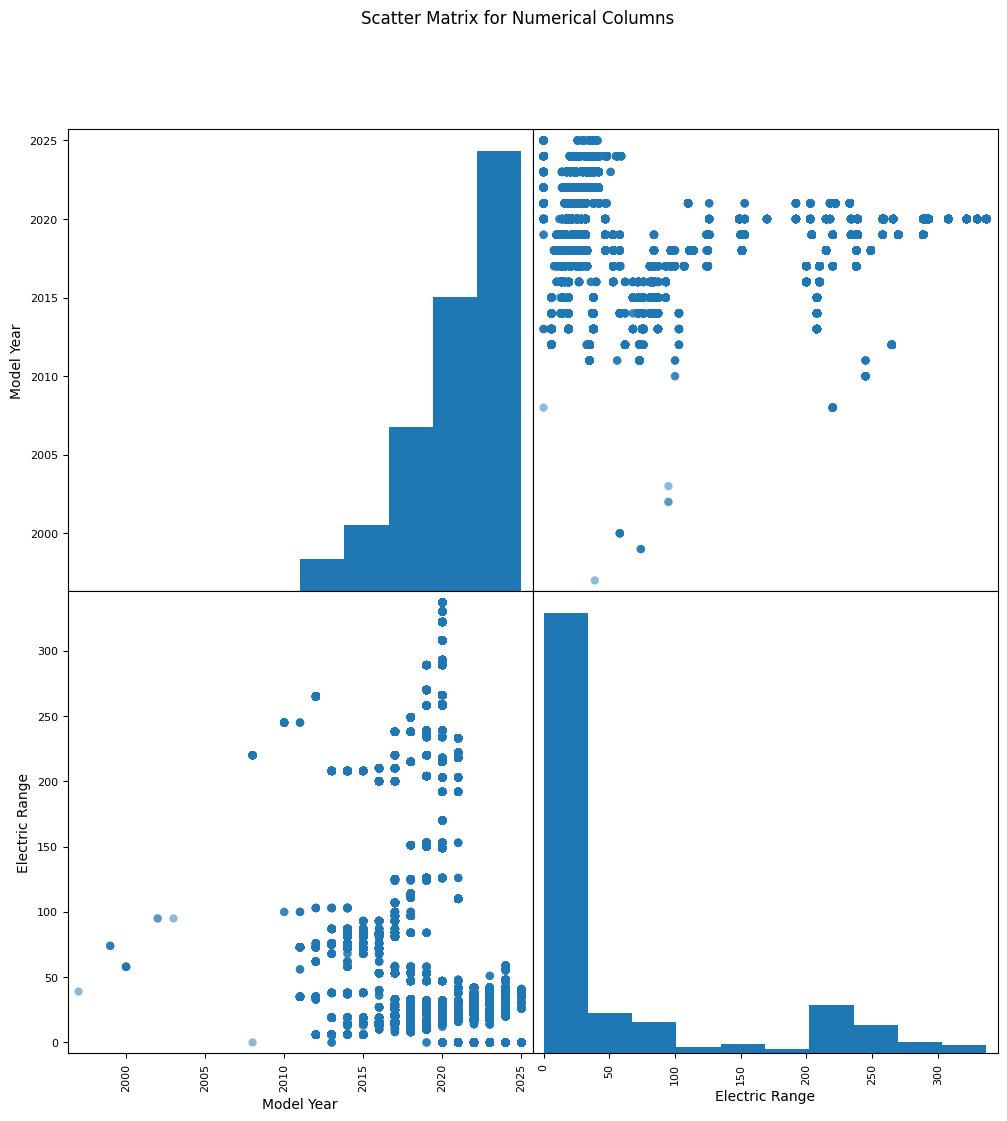

In [ ]:
pd.plotting.scatter_matrix(eCar[['Model Year', 'Electric Range']], figsize=(12, 12), alpha=0.5, marker='o')
plt.suptitle('Scatter Matrix for Numerical Columns')
plt.show()

- The scatter matrix helps visualize the relationship between these two columns by showing scatter plots for each possible pairing. For example, you can see if newer cars tend to have a higher electric range. Also, starting from the year 2000, the adoption of higher electric range vehicles shows a positive linear correlation until 2020, and a negative relationship after that year. This could mean that even though electric vehicles with a higher range became available, the adoption rate decreased after 2020 in Washington State.

# **Dealing with outliers**

This section identifies outliers in the dataset and demonstrates how we cleaned them.

1. The code below displays a bar graph showing the count difference between rows with zero values and those without zero values in the Base MSRP column, indicating a low possibility of this column contributing meaningfully to our analysis.

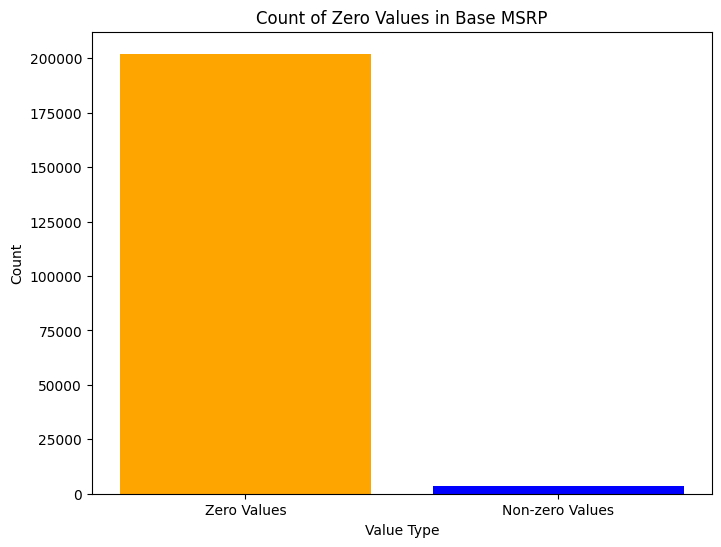

In [ ]:
zero_count = (eCar['Base MSRP'] == 0).sum()
total_count = len(eCar)
non_zero_count = total_count - zero_count

plt.figure(figsize=(8, 6))
x_labels = ['Zero Values', 'Non-zero Values']
y_values = [zero_count, non_zero_count]
plt.bar(x_labels, y_values, color=['orange', 'blue'])
plt.title('Count of Zero Values in Base MSRP')
plt.xlabel('Value Type')
plt.ylabel('Count')
plt.show()

- Since the Base MSRP column has low usability, we can drop it from our dataframe.

In [ ]:
eCar = eCar.drop(columns=['Base MSRP'])
print(eCar.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')


2. This code utilizes Tukey's Fences method to identify the outliers in the Model Year column and cleans it by updating the eCar dataframe without the outliers.

In [ ]:
Q1 = eCar['Model Year'].quantile(0.25)
Q3 = eCar['Model Year'].quantile(0.75)
IQR_year = Q3 - Q1
low_bound_year = Q1 - 1.5 * IQR_year
upp_bound_year = Q3 + 1.5 * IQR_year

eCar_updated = eCar[(eCar['Model Year'] >= low_bound_year) & (eCar['Model Year'] <= upp_bound_year)]


* Original Model Year column with outliers.

Text(0.5, 1.0, 'Model Year with outliers')

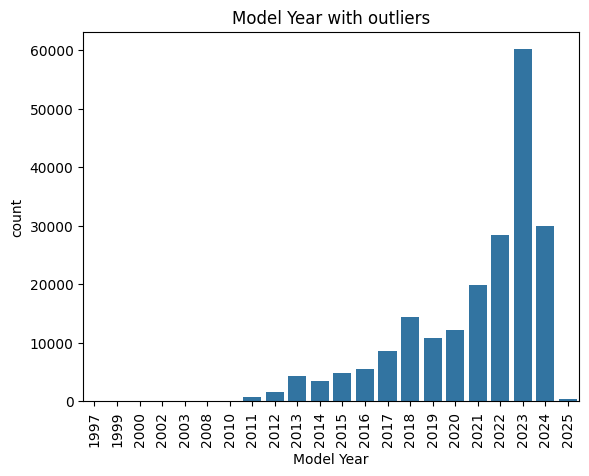

In [ ]:
sns.countplot(x='Model Year', data=eCar)
plt.xticks(rotation=90)
plt.title('Model Year with outliers')

* Updated Model Year column without outliers.

Text(0.5, 1.0, 'Model Year without outliers')

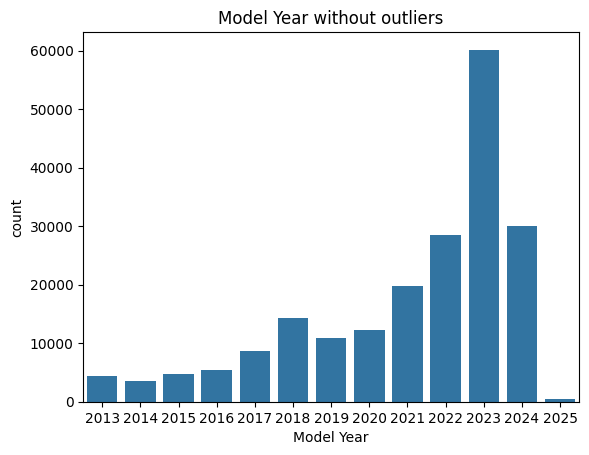

In [ ]:
sns.countplot(x='Model Year', data=eCar_updated)
plt.title('Model Year without outliers')